In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [2]:
ending = "Jan19"

In [3]:
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_angle_MC_ONLY_weighted_recoCut_incErr_nuWro_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(20):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

nuWro_events = events

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_angle_MC_ONLY_weighted_recoCut_incErr_nuWro_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(400):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+20] for x in range(0, len(AC), 20)]

print("AC")
print(chunks)
nuWro_Ac = chunks
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(20):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#prior_true_nuWro = prior_true

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_angle_MC_ONLY_weighted_recoCut_incErr_nuWro_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(20):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

nuWro_errs = errs

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_angle_MC_ONLY_weighted_recoCut_incErr_nuWro_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(400):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+20] for x in range(0, len(cov), 20)]

print("cov")
print(chunks_cov)
print("")

Unsmeared events
[-8.38183, 20.1804, 17.4149, 9.03317, 23.4911, 36.9853, 22.2701, 57.4683, 65.4907, 116.583, 157.832, 426.601, 455.554, 262.564, 344.958, 660.588, 509.96, 925.63, 1201.16, 2551.72]

AC
[[0.76493, -0.0782261, 0.110596, 0.0986229, 0.0359075, -0.13867, 0.0476392, -0.0489511, 0.143171, -0.0447632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.0782261, 0.538643, -0.132351, -0.0982443, 0.0973866, -0.0298447, -0.0654417, 0.0397496, 0.121561, -0.00966006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.110596, -0.132351, 0.384627, 0.0781728, -0.0217791, 0.144223, -0.0408016, 0.165889, 0.0646963, -0.0340001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0986229, -0.0982443, 0.0781728, 0.0567741, -0.00549967, -0.011852, -0.00146257, -0.00938269, 0.00276471, 0.0847734, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0359075, 0.0973866, -0.0217791, -0.00549967, 0.23059, 0.0747629, 0.0102548, 0.129068, 0.135976, -0.0444649, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [4]:
with open('../blockwise/stv-analysis-new/blocks.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n', '20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n']


In [5]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[   9.86719222   11.11011131   15.57770034   15.74618675   17.64766936
   26.04773527   28.72423497   46.2686312    65.88722642  147.64942938
  187.47074171  251.85384723  289.39421433  280.2775205   328.97682759
  464.37565894  530.86101108  746.41455331 1251.99147925 2985.9579509 ]


Unfolding Done with MC Data Signal: 
[-8.38183, 20.1804, 17.4149, 9.03317, 23.4911, 36.9853, 22.2701, 57.4683, 65.4907, 116.583, 157.832, 426.601, 455.554, 262.564, 344.958, 660.588, 509.96, 925.63, 1201.16, 2551.72]


Difference
[ 1.82490222e+01 -9.07028869e+00 -1.83719966e+00  6.71301675e+00
 -5.84343064e+00 -1.09375647e+01  6.45413497e+00 -1.11996688e+01
  3.96526417e-01  3.10664294e+01  2.96387417e+01 -1.74747153e+02
 -1.66159786e+02  1.77135205e+01 -1.59811724e+01 -1.96212341e+02
  2.09010111e+01 -1.79215447e+02  5.08314792e+01  4.34237951e+02]

[184.94645497 -81.63994437 -11.7937797   42.63265041 -33.11162807
 -41.99046335  22.46930155 -24.20574914   0.60182594  21.04067013
  15.

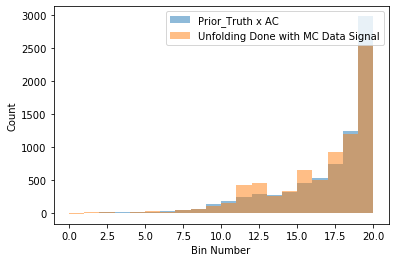

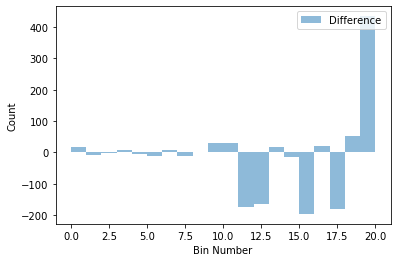

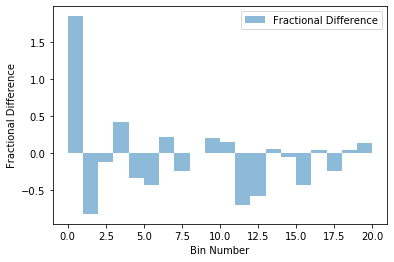

In [6]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Fractional Difference")
pyplot.show()

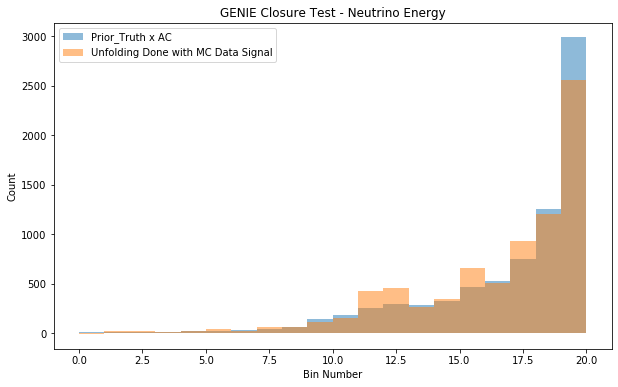

In [7]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper left')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.title("GENIE Closure Test - Neutrino Energy")
pyplot.show()

fig.savefig("nuWro_fakeData_closure_test_angle_"+ending+".svg",bbox_inches='tight' )

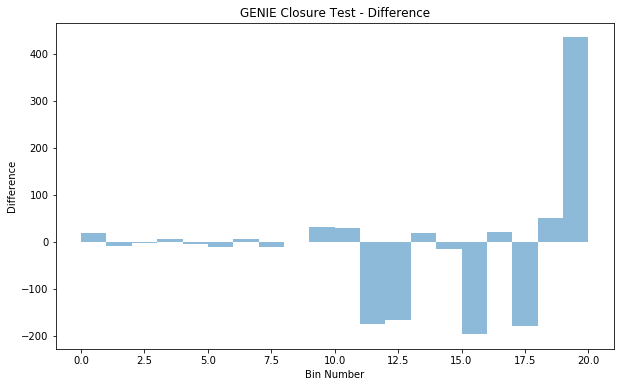

In [8]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=diff, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("GENIE Closure Test - Difference")
pyplot.show()

fig.savefig("nuWro_fakeData_closure_test_diff_angle_"+ending+".svg",bbox_inches='tight' )

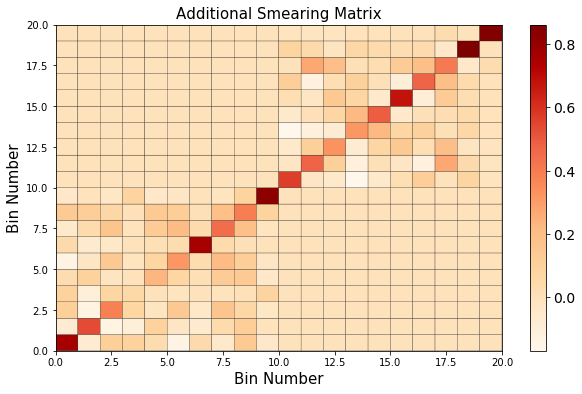

In [9]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, chunks, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title('Additional Smearing Matrix', fontsize=15)

plt.show()

fig.savefig("nuWro_fakeData_closure_test_Ac_angle_"+ending+".svg",bbox_inches='tight' )

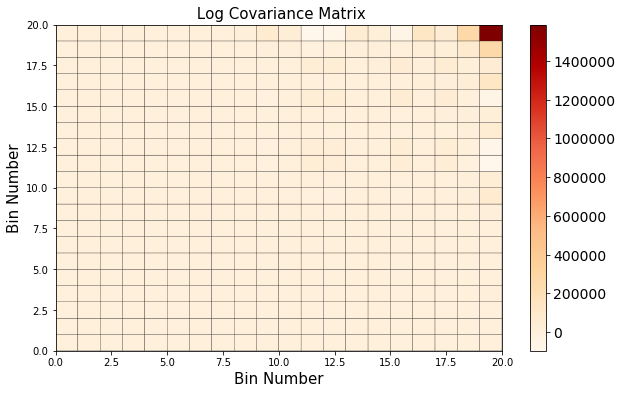

In [10]:
fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
    
plt.pcolor(bins, bins, (chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

In [11]:
test = np.diag(chunks_cov)
print(test)
print("")
print(np.sqrt(test))

[4.06328e+02 1.31545e+02 4.18759e+01 7.85308e+01 5.19250e+01 1.52929e+02
 7.90203e+01 2.08363e+02 1.92022e+02 3.57697e+03 4.43346e+03 3.66770e+04
 3.14045e+04 3.50167e+03 3.92016e+03 5.15651e+04 1.52505e+04 5.23667e+04
 8.00626e+04 1.58638e+06]

[  20.15757922   11.46930687    6.47115909    8.86176055    7.20590036
   12.36644654    8.88933631   14.43478438   13.85720029   59.80777541
   66.58423237  191.51240169  177.2131485    59.17491022   62.61118111
  227.0795015   123.49291478  228.83771542  282.95335305 1259.51577997]


In [12]:
np.savetxt("data_covmat_MC_nuWro_chi2_angleDiff_comb_"+ending+".csv", 
           chunks_cov,
           delimiter =", ", 
           fmt ='% s')

print(ending)

Jan19


## Convert to xsec units - uneeded right now

###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

nue_events = np.array(events[0:10])
numu_events = np.array(events[10:20])

nue_errs = np.array(errs[0:10])
numu_errs = np.array(errs[10:20])

#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:10]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:10]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:10]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][10:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[10:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:10]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[10:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][10:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 1E-39)
nue_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nuWro_xsec_nue_events = xsec_nue_events
nuWro_xsec_nue_errs = xsec_nue_errs
nuWro_lower_err = lower_err

nue_fig.savefig("unfolded_nuWro_fakeData_MC_nue_angle_"+ending+".svg",bbox_inches='tight' )

import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 4E-40)
numu_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Numu cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nuWro_xsec_numu_events = xsec_numu_events
nuWro_xsec_numu_errs = xsec_numu_errs
nuWro_lower_err_numu = lower_err

numu_fig.savefig("unfolded_nuWro_fakeData_MC_numu_angle_"+ending+".svg",bbox_inches='tight' )

import random
import numpy
from matplotlib import pyplot

bins = np.arange(-1.0, 1.2, 0.2)
count = np.arange(-0.95, 1.05, 0.2)
#print(count)

plt.ylim(0, 5)
plt.xlabel("cos(Lepton Angle)")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()

import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)
#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

plt.ylim(0, 6)
ratio_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nuWro_xsec_ratio_events = xsec_ratio_events
nuWro_xsec_ratio_errs = xsec_ratio_errs
nuWro_lower_err_ratio = lower_err

ratio_fig.savefig("unfolded_nuWro_fakeData_MC_ratio_angle_"+ending+".svg",bbox_inches='tight' )

## Now do the same with RUN1 genie unfolding - unneeded

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_angle_MC_ONLY_weighted_recoCut_incErr_run1_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(20):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

genie_events = events

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_angle_MC_ONLY_weighted_recoCut_incErr_run1_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(400):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+20] for x in range(0, len(AC), 20)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(20):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_angle_MC_ONLY_weighted_recoCut_incErr_run1_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(20):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

genie_errors = errs

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_angle_MC_ONLY_weighted_recoCut_incErr_run1_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(400):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+20] for x in range(0, len(cov), 20)]

print("cov")
print(chunks_cov)
print("")


made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Convert to xsec units

###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

nue_events = np.array(events[0:10])
numu_events = np.array(events[10:20])

nue_errs = np.array(errs[0:10])
numu_errs = np.array(errs[10:20])

#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:10]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:10]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:10]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][10:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[10:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:10]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[10:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][10:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 1E-39)
nue_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

genie_xsec_nue_events = xsec_nue_events
genie_xsec_nue_errs = xsec_nue_errs
genie_lower_err = lower_err

nue_fig.savefig("unfolded_run1_MC_nue_angle_"+ending+".svg",bbox_inches='tight' )

import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 4E-40)
numu_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Numu cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

genie_xsec_numu_events = xsec_numu_events
genie_xsec_numu_errs = xsec_numu_errs
genie_lower_err_numu = lower_err

numu_fig.savefig("unfolded_run1_MC_numu_angle_"+ending+".svg",bbox_inches='tight' )

import random
import numpy
from matplotlib import pyplot

bins = np.arange(-1.0, 1.2, 0.2)
count = np.arange(-0.95, 1.05, 0.2)
#print(count)

plt.ylim(0, 5)
plt.xlabel("cos(Lepton Angle)")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()

import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([-1, 1])

bins = np.arange(-1.0, 1.2, 0.2)
bincenters = np.arange(-0.9, 1.1, 0.2)
bin_edges = np.arange(-1.0, 1.2, 0.2)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(-0.95, 1.05, 0.2)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)
#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

plt.ylim(0, 6)
ratio_ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio cos(Lepton Angle)")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

genie_xsec_ratio_events = xsec_ratio_events
genie_xsec_ratio_errs = xsec_ratio_errs
genie_lower_err_ratio = lower_err

ratio_fig.savefig("unfolded_run1_MC_ratio_angle_"+ending+".svg",bbox_inches='tight' )

## Now Compare

The genie unfolded spectra should be within the uncertainties of the nuWro unfolded spectra

###############
###NUE######
#############

errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

#print(bincenters)
sel = errors_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_xsec_nue_events, alpha = 0.4, label="nuWro")  # , weights=xsec_ratio_events

errors = errors_ax1.bar(bincenters, nuWro_xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(nuWro_lower_err))

#sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nuWro_xsec_nue_events, label='nuWro')
sel_numu = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=genie_xsec_nue_events, label='genie')

errors = errors_ax1.bar(bincenters, genie_xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(genie_lower_err))


errors_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Unfolded Comparison")
leg = errors_ax1.legend()

errors_ax1.set_ylim([0, 8e-40])

for i in np.arange(len(genie_xsec_nue_events)):
    if ((genie_xsec_nue_events[i] < nuWro_xsec_nue_events[i] + nuWro_xsec_nue_errs[i]) and (genie_xsec_nue_events[i] > nuWro_xsec_nue_events[i] - nuWro_xsec_nue_errs[i])):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", genie_xsec_nue_events[i])
        print("top of err = ", nuWro_xsec_nue_events[i] + nuWro_xsec_nue_errs[i])
        print("bot of err = ", nuWro_xsec_nue_events[i] - nuWro_xsec_nue_errs[i])
        print("")

for i in np.arange(len(nuWro_xsec_nue_events)):
    if ((nuWro_xsec_nue_events[i] < genie_xsec_nue_events[i] + genie_xsec_nue_errs[i]) and (nuWro_xsec_nue_events[i] > genie_xsec_nue_events[i] - genie_xsec_nue_errs[i])):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", nuWro_xsec_nue_events[i])
        print("top of err = ", genie_xsec_nue_events[i] + genie_xsec_nue_errs[i])
        print("bot of err = ", genie_xsec_nue_events[i] - genie_xsec_nue_errs[i])
        print("")

diff = 7.723562394053671e-41 - 7.480422350351412e-41

fractional_diff = diff/7.480422350351412e-41

print(fractional_diff)

###############
###NUMU######
#############

errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

#print(bincenters)
sel = errors_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_xsec_numu_events, alpha = 0.4, label="nuWro")  # , weights=xsec_ratio_events

errors = errors_ax1.bar(bincenters, nuWro_xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(nuWro_lower_err_numu))

#sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nuWro_xsec_nue_events, label='nuWro')
sel_numu = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=genie_xsec_numu_events, label='genie')

errors = errors_ax1.bar(bincenters, genie_xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(genie_lower_err_numu))

print(genie_xsec_numu_errs)
print(nuWro_xsec_numu_errs)

errors_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Unfolded Comparison")
leg = errors_ax1.legend()

errors_ax1.set_ylim([0, 1e-40])

for i in np.arange(len(genie_xsec_numu_events)):
    if ((genie_xsec_numu_events[i] < nuWro_xsec_numu_events[i] + nuWro_xsec_numu_errs[i]) and (genie_xsec_numu_events[i] > nuWro_xsec_numu_events[i] - nuWro_xsec_numu_errs[i])):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", genie_xsec_numu_events[i])
        print("top of err = ", nuWro_xsec_numu_events[i] + nuWro_xsec_numu_errs[i])
        print("bot of err = ", nuWro_xsec_numu_events[i] - nuWro_xsec_numu_errs[i])
        print("")

###############
###RATIO######
#############

errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

#print(bincenters)
sel = errors_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_xsec_ratio_events, alpha = 0.4, label="nuWro")  # , weights=xsec_ratio_events

errors = errors_ax1.bar(bincenters, nuWro_xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(nuWro_lower_err_ratio))



#sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nuWro_xsec_nue_events, label='nuWro')
sel_numu = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=genie_xsec_ratio_events, label='genie')

errors = errors_ax1.bar(bincenters, genie_xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(genie_lower_err_ratio))


errors_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Unfolded Comparison")
leg = errors_ax1.legend()

#errors_ax1.set_ylim([0, 5e-40])

for i in np.arange(len(genie_xsec_ratio_events)):
    if ((genie_xsec_ratio_events[i] < nuWro_xsec_ratio_events[i] + nuWro_xsec_ratio_errs[i]) and (genie_xsec_ratio_events[i] > nuWro_xsec_ratio_events[i] - nuWro_xsec_ratio_errs[i])):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", genie_xsec_ratio_events[i])
        print("top of err = ", nuWro_xsec_ratio_events[i] + nuWro_xsec_ratio_errs[i])
        print("bot of err = ", nuWro_xsec_ratio_events[i] - nuWro_xsec_ratio_errs[i])
        print("")

## Try without xsec units 

print(genie_events)
print(genie_errors)
print("")
print(nuWro_events)
print(nuWro_errs)

###############
###NUE######
#############

nue_unf_fig = plt.figure(figsize=(8, 7))
nue_unf_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_unf_ax1 = plt.subplot(nue_unf_gs[0])


#bins = np.arange(-1, 1.2, 0.2)
#count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
bincenters = np.arange(0.5, 20.5, 1)
bin_size = [0.5]*20

print(np.array(nuWro_events) - np.array(nuWro_errs))

#print(bincenters)
sel = nue_unf_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_events, alpha = 0.4, label="nuWro")  # , weights=xsec_ratio_events

errors = nue_unf_ax1.bar(bincenters, np.array(nuWro_errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(nuWro_events) - np.array(nuWro_errs)))

#sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nuWro_xsec_nue_events, label='nuWro')
sel_numu = nue_unf_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=genie_events, label='genie')

errors = nue_unf_ax1.bar(bincenters, np.array(genie_errors)*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(np.array(genie_events) - np.array(genie_errors)))


nue_unf_ax1.set_ylabel('count', fontsize=15)
nue_unf_ax1.set_xlabel('bins', fontsize=15)
nue_unf_ax1.set_title("Unfolded Comparison")
leg = nue_unf_ax1.legend()

nue_unf_ax1.set_ylim([150, 1500])

## Actual comparison needed

Need to compare the unfolded signal w/err to the nuWro true selected signal x Ac

In [12]:
print(nuWro_events)
print(nuWro_errs)

[-8.38183, 20.1804, 17.4149, 9.03317, 23.4911, 36.9853, 22.2701, 57.4683, 65.4907, 116.583, 157.832, 426.601, 455.554, 262.564, 344.958, 660.588, 509.96, 925.63, 1201.16, 2551.72]
[20.1576, 11.4693, 6.47116, 8.86176, 7.2059, 12.3665, 8.88934, 14.4348, 13.8572, 59.8078, 66.5843, 191.512, 177.213, 59.1749, 62.6112, 227.079, 123.493, 228.838, 282.953, 1259.52]


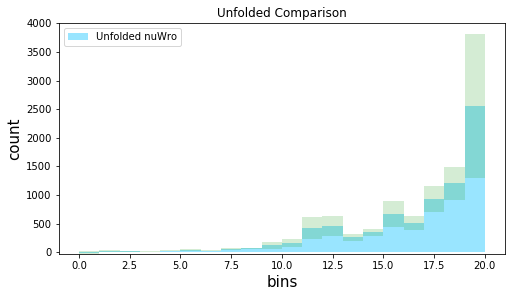

In [13]:
###############
###BOTH######
#############

nue_unf_fig = plt.figure(figsize=(8, 7))
nue_unf_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_unf_ax1 = plt.subplot(nue_unf_gs[0])


#bins = np.arange(-1, 1.2, 0.2)
#count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
bincenters = np.arange(0.5, 20.5, 1)
bin_size = [0.5]*20

#print(np.array(nuWro_events) - np.array(nuWro_errs))

#print(bincenters)
sel = nue_unf_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_events, alpha = 0.4, label="Unfolded nuWro")  # , weights=xsec_ratio_events

errors = nue_unf_ax1.bar(bincenters, np.array(nuWro_errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(nuWro_events) - np.array(nuWro_errs)))


nue_unf_ax1.set_ylabel('count', fontsize=15)
nue_unf_ax1.set_xlabel('bins', fontsize=15)
nue_unf_ax1.set_title("Unfolded Comparison")
leg = nue_unf_ax1.legend()

#nue_unf_ax1.set_ylim([150, 1500])

In [14]:
nue_nuWro_true = pd.read_csv("nue_nuWro_prior_true_run1_angle_"+ending+".csv", header=None)

nue_nuWro_true = nue_nuWro_true.values[:, 0]
print(nue_nuWro_true)
print("")
#########################################

numu_nuWro_true = pd.read_csv("numu_nuWro_prior_true_run1_angle_"+ending+".csv", header=None)

numu_nuWro_true = numu_nuWro_true.values[:, 0]
print(numu_nuWro_true)

[  8.92293032  11.03283799  11.79438326  14.73940691  18.42315658
  23.1503012   31.57973141  44.02539694  72.58131567 151.49451282]

[ 224.6305589   247.73406233  287.83613845  332.36727161  419.89611366
  472.06842169  606.3464843   843.02289316 1339.04765564 3275.12028823]


In [17]:
"""
nue_nuWro_true_err = pd.read_csv("nue_nuWro_stat_err_inTruth_"+ending+".csv", header=None)

nue_nuWro_true_err = nue_nuWro_true_err.values[:, 0]
nue_nuWro_true_err = np.sqrt(nue_nuWro_true_err)
print(nue_nuWro_true_err)
print("")
###############################

numu_nuWro_true_err = pd.read_csv("numu_nuWro_stat_err_inTruth_"+ending+".csv", header=None)

numu_nuWro_true_err = numu_nuWro_true_err.values[:, 0]
numu_nuWro_true_err = np.sqrt(numu_nuWro_true_err)
print(numu_nuWro_true_err)
"""

'\nnue_nuWro_true_err = pd.read_csv("nue_nuWro_stat_err_inTruth_"+ending+".csv", header=None)\n\nnue_nuWro_true_err = nue_nuWro_true_err.values[:, 0]\nnue_nuWro_true_err = np.sqrt(nue_nuWro_true_err)\nprint(nue_nuWro_true_err)\nprint("")\n###############################\n\nnumu_nuWro_true_err = pd.read_csv("numu_nuWro_stat_err_inTruth_"+ending+".csv", header=None)\n\nnumu_nuWro_true_err = numu_nuWro_true_err.values[:, 0]\nnumu_nuWro_true_err = np.sqrt(numu_nuWro_true_err)\nprint(numu_nuWro_true_err)\n'

In [15]:
nue_numu_tot_nuWro_true = np.concatenate((nue_nuWro_true, numu_nuWro_true), axis=0)

print(nue_numu_tot_nuWro_true)

##################################
print("")
"""
nue_numu_tot_nuWro_true_err = np.concatenate((nue_nuWro_true_err, numu_nuWro_true_err), axis=0)

print(nue_numu_tot_nuWro_true_err)

"""

[   8.92293032   11.03283799   11.79438326   14.73940691   18.42315658
   23.1503012    31.57973141   44.02539694   72.58131567  151.49451282
  224.6305589   247.73406233  287.83613845  332.36727161  419.89611366
  472.06842169  606.3464843   843.02289316 1339.04765564 3275.12028823]



'\nnue_numu_tot_nuWro_true_err = np.concatenate((nue_nuWro_true_err, numu_nuWro_true_err), axis=0)\n\nprint(nue_numu_tot_nuWro_true_err)\n\n'

In [19]:
#with open('../blockwise/stv-analysis-new/blockwise_unsmeared_err_prop_angle_MC_ONLY_weighted_recoCut_incErr_nuWro_'+ending+'.csv') as file:
#    content = file.readlines()
#EP = content[0:]
    
#for i in range(400):
#    EP[i]=EP[i].rstrip().rstrip(',')
#    EP[i] = float(EP[i])
    

#EP_chunks = [EP[x:x+20] for x in range(0, len(EP), 20)]

#print("EP")
#print(EP_chunks)
#print("")

In [16]:
#Now smear it by Ac

smeared_nuWro = np.dot(nue_numu_tot_nuWro_true, nuWro_Ac)
#smeared_nuWro = np.dot(prior_true_nuWro, nuWro_Ac)
print("Prior_Truth x AC: ")
print(smeared_nuWro)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(nuWro_events)
print("")

diff = smeared_nuWro - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/smeared_nuWro)
print(diffasfrac*100)

Prior_Truth x AC: 
[   9.13119499   10.38192041   13.71259783   13.7633167    16.17513948
   23.35039327   26.32169554   41.66036422   59.16181238  129.9146121
  174.77410555  247.65264684  289.11819121  277.59272876  333.08078673
  443.50304103  519.13124662  725.60025996 1205.4165305  2807.01359801]


Unfolding Done with MC Data Signal: 
[-8.38183, 20.1804, 17.4149, 9.03317, 23.4911, 36.9853, 22.2701, 57.4683, 65.4907, 116.583, 157.832, 426.601, 455.554, 262.564, 344.958, 660.588, 509.96, 925.63, 1201.16, 2551.72]


Difference
[  17.51302499   -9.79847959   -3.70230217    4.7301467    -7.31596052
  -13.63490673    4.05159554  -15.80793578   -6.32888762   13.3316121
   16.94210555 -178.94835316 -166.43580879   15.02872876  -11.87721327
 -217.08495897    9.17124662 -200.02974004    4.2565305   255.29359801]

[191.79335242 -94.3802226  -26.99927625  34.36778213 -45.22965956
 -58.39262134  15.39260848 -37.94478535 -10.69758915  10.2618265
   9.69371607 -72.25779956 -57.56670242   5.41394

In [21]:
#smeared_nuWro_err = np.dot(nue_numu_tot_nuWro_true_err, nuWro_Ac)
#smeared_nuWro = np.dot(prior_true_nuWro, nuWro_Ac)
#print("Err x AC: ")
#print(smeared_nuWro_err)
#print("")
#print("")


unfolded =  [  -8.38183   20.1804    17.4149     9.03317   23.4911    36.9853
   22.2701    57.4683    65.4907   116.583    157.832    426.601
  455.554    262.564    344.958    660.588    509.96     925.63
 1201.16    2551.72   ]
smeared =  [   9.13119499   10.38192041   13.71259783   13.7633167    16.17513948
   23.35039327   26.32169554   41.66036422   59.16181238  129.9146121
  174.77410555  247.65264684  289.11819121  277.59272876  333.08078673
  443.50304103  519.13124662  725.60025996 1205.4165305  2807.01359801]


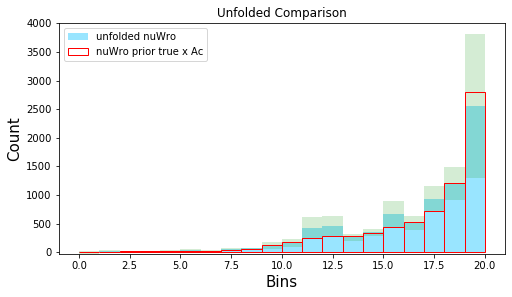

In [17]:
###############
###NUE######
#############

nue_unf_fig = plt.figure(figsize=(8, 7))
nue_unf_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_unf_ax1 = plt.subplot(nue_unf_gs[0])


#bins = np.arange(-1, 1.2, 0.2)
#count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
bincenters = np.arange(0.5, 20.5, 1)
bin_size = [0.5]*20

#print(np.array(nuWro_events) - np.array(nuWro_errs))

#print(bincenters)
f_obs = nue_unf_ax1.hist(count, bins, color='deepskyblue', weights=nuWro_events, alpha = 0.4, label="unfolded nuWro")  # , weights=xsec_ratio_events

errors = nue_unf_ax1.bar(bincenters, np.array(nuWro_errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(nuWro_events) - np.array(nuWro_errs)))

f_exp = nue_unf_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=smeared_nuWro, label='nuWro prior true x Ac')
#errors = nue_unf_ax1.bar(bincenters, np.array((nue_numu_tot_nuWro_true_err))*2,width=[n*2 for n in bin_size],facecolor='tab:orange',alpha=0.2,bottom=(np.array(smeared_nuWro) - np.array((nue_numu_tot_nuWro_true_err))))


print("unfolded = ", f_obs[0])
print("smeared = ", f_exp[0])

nue_unf_ax1.set_ylabel('Count', fontsize=15)
nue_unf_ax1.set_xlabel('Bins', fontsize=15)
nue_unf_ax1.set_title("Unfolded Comparison")
leg = nue_unf_ax1.legend()

#nue_unf_ax1.set_ylim([0, 200])

nue_unf_fig.savefig("unfolded_MC_nuWro_output_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

In [21]:
np.savetxt("data_signal_MC_nuWro_chi2_angleDiff_comb_"+ending+".csv", 
               nuWro_events,
               delimiter =", ", 
               fmt ='% s')

np.savetxt("prior_true_MC_nuWro_chi2_angleDiff_comb_"+ending+".csv", 
               smeared_nuWro,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Jan19


In [24]:
"""
start1 = np.array(smeared_nuWro) - np.array((nue_numu_tot_nuWro_true_err))
end1 = np.array(smeared_nuWro) + np.array((nue_numu_tot_nuWro_true_err))

start2 = np.array(nuWro_events) - np.array((nuWro_errs))
end2 = np.array(nuWro_events) + np.array((nuWro_errs))
#print(top)
#print(minus)

def overlap(start1, end1, start2, end2):
    #Does the range (start1, end1) overlap with (start2, end2)?
    return end1 >= start2 and end2 >= start1


for i in np.arange(len(smeared_nuWro)):
    print(overlap(start1[i], end1[i], start2[i], end2[i]))
"""

'\nstart1 = np.array(smeared_nuWro) - np.array((nue_numu_tot_nuWro_true_err))\nend1 = np.array(smeared_nuWro) + np.array((nue_numu_tot_nuWro_true_err))\n\nstart2 = np.array(nuWro_events) - np.array((nuWro_errs))\nend2 = np.array(nuWro_events) + np.array((nuWro_errs))\n#print(top)\n#print(minus)\n\ndef overlap(start1, end1, start2, end2):\n    #Does the range (start1, end1) overlap with (start2, end2)?\n    return end1 >= start2 and end2 >= start1\n\n\nfor i in np.arange(len(smeared_nuWro)):\n    print(overlap(start1[i], end1[i], start2[i], end2[i]))\n'

In [18]:
for i in np.arange(len(smeared_nuWro)):
    print("bin = ", i)
    if( ((smeared_nuWro[i] < nuWro_events[i] + nuWro_errs[i]) and (smeared_nuWro[i] > nuWro_events[i] - nuWro_errs[i]))):# or ((nuWro_events[i] < smeared_nuWro[i] + nue_numu_tot_nuWro_true_err[i]) and (nuWro_events[i] > smeared_nuWro[i] - nue_numu_tot_nuWro_true_err[i])) ):
        print("Inside")
        print("")
    else:
        print("outside")
        print("value is (genie) = ", smeared_nuWro[i])
        print("top of err = ", nuWro_events[i] + nuWro_errs[i])
        print("bot of err = ", nuWro_events[i] - nuWro_errs[i])
        print("")

bin =  0
Inside

bin =  1
Inside

bin =  2
Inside

bin =  3
Inside

bin =  4
outside
value is (genie) =  16.175139480151483
top of err =  30.697
bot of err =  16.2852

bin =  5
outside
value is (genie) =  23.350393274079586
top of err =  49.351800000000004
bot of err =  24.6188

bin =  6
Inside

bin =  7
outside
value is (genie) =  41.660364221561615
top of err =  71.9031
bot of err =  43.033500000000004

bin =  8
Inside

bin =  9
Inside

bin =  10
Inside

bin =  11
Inside

bin =  12
Inside

bin =  13
Inside

bin =  14
Inside

bin =  15
Inside

bin =  16
Inside

bin =  17
Inside

bin =  18
Inside

bin =  19
Inside



In [19]:
f_obs = f_obs[0]
f_exp = f_exp[0]

In [20]:
###Do a chi squared test

import scipy.stats as sp


#print(f_obs)
print(sum(f_obs))
print(sum(f_exp))

#sp.chisquare(f_obs=f_obs, f_exp=f_exp)

7857.102139999999
7366.456182118744


In [21]:
hold = []

#for i in range(len(f_obs)):
for i in range(20):   
    braket = (f_obs[i] - f_exp[i])
    num = (braket*braket)/f_exp[i]
    hold.append(num)
    
print("final value = ", sum(hold))
chi_squared_stat = sum(hold)

final value =  478.1920157509936


In [22]:
####Crital value - what the chi sqaured value must be below for a P value of this significance

deg_of_free = 19*19

sp.chi2.ppf(q = 0.01, df = deg_of_free)

301.4458745323536

In [23]:
p_value = 1 - sp.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=deg_of_free)
print("P value:",p_value)

P value: 3.347955250398993e-05


In [31]:
#####up to 11 has really good p value, 

In [ ]:
##Now try Katrina's way - seems to match Stevens

In [24]:
inverse_unfcov = np.linalg.inv(chunks_cov)

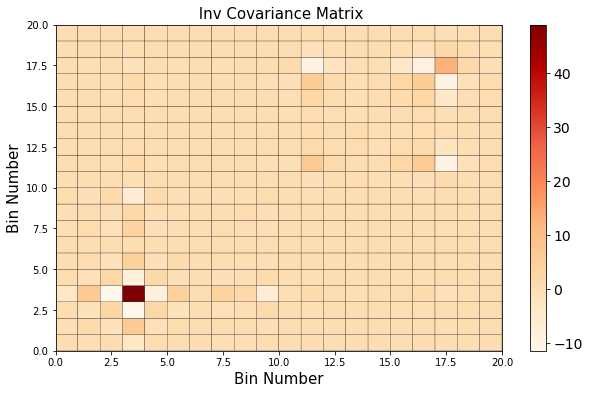

In [25]:
fig = plt.figure(figsize=(10, 6))  

#print(bins)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)
    
plt.pcolor(bins, bins, inverse_unfcov , cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Inv Covariance Matrix', fontsize=15)

plt.show()

In [26]:
chi2_genie = 0

print(len(bins)-1)
print(len(f_obs))

for i in range(len(bins)-1): 
    
    for j in range(len(f_obs)): 

            print(( (f_obs[i]-f_exp[i])*inverse_unfcov[i][j]*(f_obs[j]-f_exp[j]) ))
            chi2_genie = chi2_genie  + ( (f_obs[i]-f_exp[i])*inverse_unfcov[i][j]*(f_obs[j]-f_exp[j]) )
            print("chi2 genie = ", chi2_genie)
            print("------------------")
  

20
20
119.14841214869705
chi2 genie =  119.14841214869705
------------------
66.03575393027197
chi2 genie =  185.184166078969
------------------
-39.630354767134605
chi2 genie =  145.5538113118344
------------------
-275.1783400238913
chi2 genie =  -129.62452871205687
------------------
-55.99169401605466
chi2 genie =  -185.61622272811152
------------------
7.574234925984031
chi2 genie =  -178.0419878021275
------------------
-2.870563808246459
chi2 genie =  -180.91255161037395
------------------
52.46873626872358
chi2 genie =  -128.44381534165038
------------------
33.86585291624639
chi2 genie =  -94.577962425404
------------------
103.54241451219795
chi2 genie =  8.964452086793955
------------------
4.337810823612906
chi2 genie =  13.30226291040686
------------------
166.50139482655703
chi2 genie =  179.80365773696388
------------------
-7.115852949749404
chi2 genie =  172.68780478721447
------------------
5.315226064921175
chi2 genie =  178.00303085213565
------------------
2.919557

In [27]:
chi2_genie

2.191882872925362

In [28]:
p_value = 1 - sp.chi2.cdf(x=chi2_genie,  # Find the p-value
                             df=19)
print("P value:",p_value)

P value: 0.9999992146517964


## Values from Steven's Code which takes uncertainty into account

chi2 =  27.134

num_bins =  20

dof =  19

p_value =  0.101571